<a href="https://colab.research.google.com/github/Dennis826/Machine-learning/blob/master/Course01_01_Hello_World.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Hello World of Deep Learning with Neural Networks**

# **01, Linear regression**

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from numpy import random

In [0]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

In [0]:
#x_list=random.randint(1,1000,30)
#y_list=x_list*2-1
#print(x_list)
#print(y_list)

#xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
#ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)
#xs=np.array(x_list)
#ys=np.array(y_list)

In [0]:
x_train=np.linspace(1,1000,30)
y_train=x_train*2-1

#print(x_train)
#print(y_train)

In [0]:
model.fit(xs, ys, epochs=1000,verbose=1)

In [0]:
print(model.predict([200]))

[[398.99637]]


In [0]:
W,b=model.layers[0].get_weights()   #layers[0]只有一个网络层
print('W:',W,'b:',b)

W: [[1.9999815]] b: [-0.99994224]


# **02, Polynomial regression**

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [0]:
#part1: train data  
#generate 1000 numbers from -2pi to 2pi
x_train = np.linspace(-2*np.pi,2*np.pi,2000).reshape(2000, 1)
n=0.1*np.random.rand(len(x_train),1)
y_train=np.sin(x_train)+n

#训练数据集：零均值单位方差
x_train = preprocessing.scale(x_train)
scaler = preprocessing.StandardScaler().fit(x_train)
y_train = scaler.transform(y_train)

In [0]:
#part2: test data 
x_test = np.linspace(-5,5,500).reshape(500, 1)
x_test = scaler.transform(x_test)
y_test=np.sin(x_test)

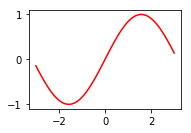

In [34]:
#prediction data
x_prd = np.linspace(-3,3,100).reshape(100, 1)
x_prd = scaler.transform(x_prd)
y_prd=np.sin(x_prd)

#plot prediction data
plt.subplot(2,2,1)
plt.plot(x_prd, y_prd,'r')

In [0]:
#Create model
model = tf.keras.Sequential([keras.layers.Dense(units=10, input_shape=[1],activation='relu'),
                             keras.layers.Dense(units=1)])

model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])

In [39]:
#fit model 
hist = model.fit(x_test, y_test, batch_size=10, epochs=1000, shuffle=True,verbose=0,validation_split=0.2)
W,b=model.layers[0].get_weights()   #layers[0]只有一个网络层
print('W:',W,'b:',b)
score = model.evaluate(x_test, y_test, batch_size=10)

W: [[ 0.5272362  -0.6516679   0.00110904  0.32955864 -0.4960883   0.98466104
  -0.00209738  0.22181012  0.6049366  -0.42126784]] b: [ 0.4607964  -0.8481425  -0.00612743  0.65777755 -0.89755887 -1.2603163
 -0.01662214  0.442041    0.4903106   0.8614537 ]
500/500 [==============================] - 0s 61us/sample - loss: 0.0256 - acc: 0.0000e+00


Text(0, 0.5, 'Predicted')

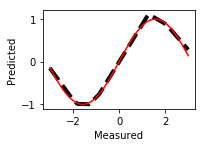

In [40]:
out = model.predict(x_prd, batch_size=1)

plt.subplot(2,2,2)
plt.plot(x_prd, out, 'k--', lw=4)
plt.plot(x_prd, y_prd,'r')
plt.xlabel('Measured')
plt.ylabel('Predicted')

In [0]:
defsgd=keras.optimizers.SGD(lr=0.2)

model = keras.Sequential([keras.layers.Dense(units=10, input_shape=[1],activation='tanh'),
                          keras.layers.Dense(units=10, input_shape=[1],activation='tanh'),
                          keras.layers.Dense(units=1,activation='tanh')])
model.compile(optimizer=defsgd, loss='mean_squared_error')

[-1.         -0.99599198 -0.99198397 -0.98797595 -0.98396794 -0.97995992
 -0.9759519  -0.97194389 -0.96793587 -0.96392786]
[2.         1.99196797 1.98390419 1.97580906 1.96768297 1.95952628
 1.9513394  1.94312271 1.9348766  1.92660145]


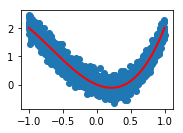

In [62]:
np.random.seed(0)
x_train=np.linspace(-1,1,2000)
noise=np.random.normal(0,0.2,x_train.shape)
y_train=x_train**3+2*x_train**2-x_train+noise

x_test=np.linspace(-1,1,500)
y_test=x_test**3+2*x_test**2-x_test

print(x_test[0:10])
print(y_test[0:10])
plt.subplot(2,2,3)
plt.scatter(x_train,y_train)
plt.plot(x_test,y_test,'r-',lw=2)

In [0]:
model.fit(x_train, y_train, batch_size=10,epochs=1000,verbose=1,validation_split=0.2)

#打印权值和偏置值
W,b=model.layers[0].get_weights()
print('W:',W,'b:',b)
score = model.evaluate(x_test, y_test, batch_size=10)

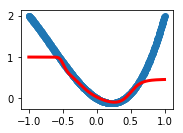

In [60]:
#x_data输入网络中，得到预测值y_pred
y_pred=model.predict(x_test)

plt.subplot(2,2,4)
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,'r-',lw=3)

In [63]:
print(model.predict([-1]))

[[0.99999094]]
